<a href="https://colab.research.google.com/github/Andhanaseptian/Tubes-AI/blob/main/Tubes_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
base_dir = '/content/drive/My Drive/Colab NoteBooks/tutorial/dataset/pandan_and_seledri_filtered/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_pandan_dir = os.path.join(train_dir, 'pandan')

# Directory with our training dog pictures
train_seledri_dir = os.path.join(train_dir, 'seledri')

# Directory with our validation cat pictures
validation_pandan_dir = os.path.join(validation_dir, 'pandan')

# Directory with our validation dog pictures
validation_seledri_dir = os.path.join(validation_dir, 'seledri')


validation_BelimbingWuluh_dir = os.path.join(validation_dir, 'BelimbingWuluh')
validation_JambuBiji_dir = os.path.join(validation_dir, 'JambuBiji')
validation_JerukNipis_dir = os.path.join(validation_dir, 'JerukNipis')
validation_Kemangi_dir = os.path.join(validation_dir, 'Kemangi')
validation_LidahBuaya_dir = os.path.join(validation_dir, 'LidahBuaya')
validation_Nangka_dir = os.path.join(validation_dir, 'Nangka')
validation_Pepaya_dir = os.path.join(validation_dir, 'Pepaya')
validation_Sirih_dir = os.path.join(validation_dir, 'Sirih')

In [ ]:
train_pandans_fnames = os.listdir(train_pandan_dir)
print(train_pandans_fnames[:10])

train_seledris_fnames = os.listdir(train_seledri_dir)
train_seledris_fnames.sort()
print(train_seledris_fnames[:10])

['Pandan028.jpg', 'Pandan005.jpg', 'Pandan035.jpg', 'Pandan011.jpg', 'Pandan044.jpg', 'Pandan034.jpg', 'Pandan018.jpg', 'Pandan045.jpg', 'Pandan047.jpg', 'Pandan046.jpg']
['Seledri001.jpg', 'Seledri002.jpg', 'Seledri003.jpg', 'Seledri004.jpg', 'Seledri005.jpg', 'Seledri006.jpg', 'Seledri007.jpg', 'Seledri008.jpg', 'Seledri009.jpg', 'Seledri010.jpg']


In [3]:
print('total training pandan images:', len(os.listdir(train_pandan_dir)))
print('total training seledri images:', len(os.listdir(train_seledri_dir)))

print('total validation pandan images:', len(os.listdir(validation_pandan_dir)))
print('total validation seledri images:', len(os.listdir(validation_seledri_dir)))
print('total validation Belimbing Wuluh images:', len(os.listdir(validation_BelimbingWuluh_dir)))
print('total validation Jambu Biji images:', len(os.listdir(validation_JambuBiji_dir)))
print('total validation Jeruk Nipis images:', len(os.listdir(validation_JerukNipis_dir)))
print('total validation Kemangi images:', len(os.listdir(validation_Kemangi_dir)))
print('total validation Lidah Buaya images:', len(os.listdir(validation_LidahBuaya_dir)))
print('total validation Nangka images:', len(os.listdir(validation_Nangka_dir)))
print('total validation Pepaya images:', len(os.listdir(validation_Pepaya_dir)))
print('total validation Sirih images:', len(os.listdir(validation_Sirih_dir)))

total training pandan images: 350
total training seledri images: 350
total validation pandan images: 350
total validation seledri images: 350
total validation Belimbing Wuluh images: 350
total validation Jambu Biji images: 350
total validation Jeruk Nipis images: 350
total validation Kemangi images: 350
total validation Lidah Buaya images: 350
total validation Nangka images: 350
total validation Pepaya images: 350
total validation Sirih images: 350


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

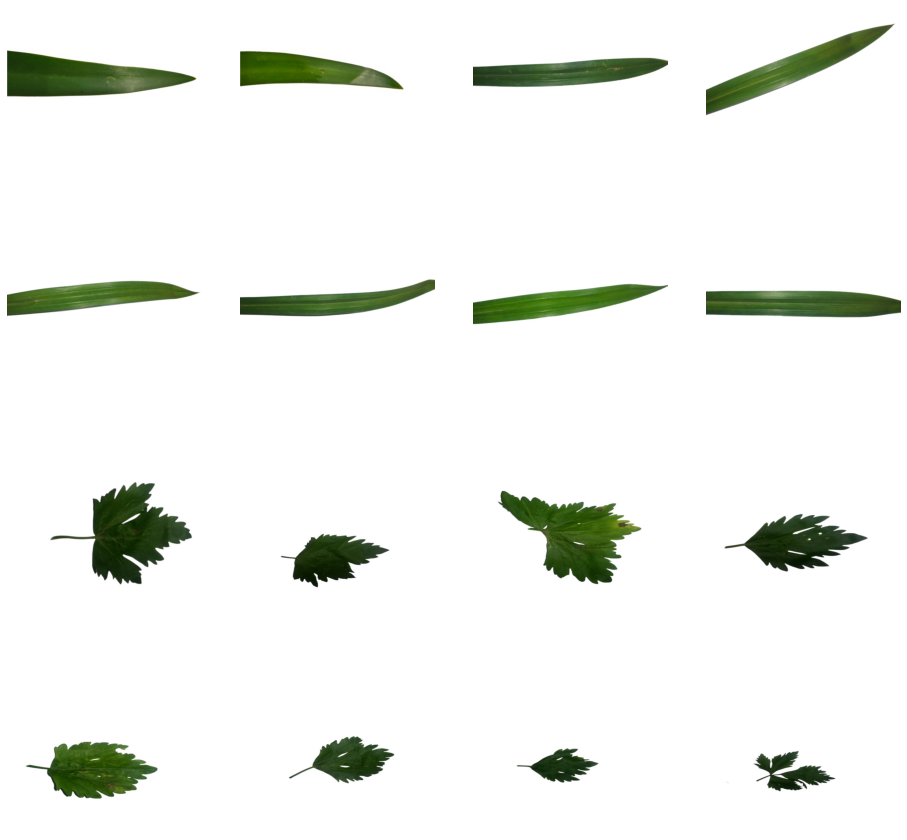

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_pandans_pix = [os.path.join(train_pandan_dir, fname) 
                for fname in train_pandans_fnames[pic_index-8:pic_index]]
next_seledris_pix = [os.path.join(train_seledri_dir, fname) 
                for fname in train_seledris_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_pandans_pix+next_seledris_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 700 images belonging to 2 classes.
Found 700 images belonging to 2 classes.


In [ ]:
import keras as tf
# define the checkpoint
checkpoint_filepath="/content/drive/My Drive/Colab NoteBooks/tutorial/Klasifikasi CNN pandan and seledri dengan test/pandan-seledri-{epoch:02d}-{acc:.4f}-{val_acc:.4f}.h5"
model_checkpoint_callback = tf.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,  # 2000 images = batch_size * steps
      epochs=5,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      callbacks=[model_checkpoint_callback])

<ipython-input-38-e9a03a48cb36>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
10/10 [==============================] - 28s 3s/step - loss: 0.6662 - acc: 0.6500 - val_loss: 0.4898 - val_acc: 0.9300
Epoch 2/5
10/10 [==============================] - 31s 3s/step - loss: 0.7373 - acc: 0.5500 - val_loss: 0.6203 - val_acc: 0.9100
Epoch 3/5
10/10 [==============================] - 22s 2s/step - loss: 0.6672 - acc: 0.5400 - val_loss: 0.4978 - val_acc: 0.8800
Epoch 4/5
10/10 [==============================] - 20s 2s/step - loss: 0.5984 - acc: 0.6700 - val_loss: 0.6689 - val_acc: 0.4600
Epoch 5/5
10/10 [==============================] - 22s 2s/step - loss: 0.5965 - acc: 0.7100 - val_loss: 0.3802 - val_acc: 0.8000


Text(0.5, 1.0, 'Validation loss')

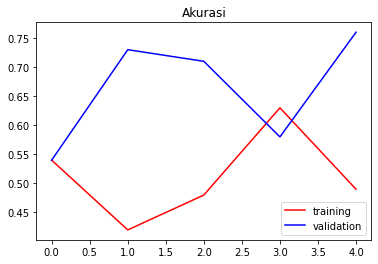

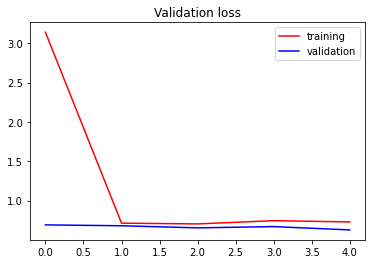

In [ ]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs,acc,'red',label='training')
plt.plot(epochs,val_acc,'blue',label='validation')
plt.legend()
plt.title('Akurasi')

plt.figure()

# Plot training and validation loss per epoch
#plt.plot(epochs, loss)
#plt.plot(epochs, val_loss)

plt.plot(epochs,loss,'r',label='training')
plt.plot(epochs,val_loss,'b',label='validation')
plt.legend()
plt.title('Validation loss')

In [ ]:
from tensorflow.keras.models import load_model

DIR = '/content/drive/My Drive/Colab NoteBooks/tutorial/Klasifikasi CNN pandan and seledri dengan test/'
# load model
model = load_model(DIR+'pandan-seledri-01-0.6500-0.9300.h5')


In [ ]:
import numpy
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
test_data_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

Found 700 images belonging to 2 classes.


In [ ]:
predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.round(predictions, 0)

<ipython-input-55-67839a578df7>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)


In [ ]:
from keras import metrics
true_classes = test_data_generator.classes
class_labels = ['pandan','seledri']
#for i in range(2):
#  class_labels.append("kelas_"+str(i))
#print(len(class_labels))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(true_classes, predicted_classes))

report = classification_report(true_classes, predicted_classes, target_names=class_labels, digits=4)
print(report)

[[206 144]
 [206 144]]
              precision    recall  f1-score   support

      pandan     0.5000    0.5886    0.5407       350
     seledri     0.5000    0.4114    0.4514       350

    accuracy                         0.5000       700
   macro avg     0.5000    0.5000    0.4960       700
weighted avg     0.5000    0.5000    0.4960       700

